In [138]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import os

In [79]:
# Import data

filename_1 = "pre_outdoor_embedding.csv "
filename_2 = "pre_outdoor_mfcc.csv "
filename_3 = "pre_TV_embedding.csv"
filename_4 = "pre_TV_mfcc.csv"
data_1 = np.array(pd.read_csv(filename_1, header = None))
data_2 = np.array(pd.read_csv(filename_2, header = None))
data_3 = np.array(pd.read_csv(filename_3, header = None))
data_4 = np.array(pd.read_csv(filename_4, header = None))
X_1 = data_1[:, :-1]
Y_1 = data_1[:, -1]
X_2 = data_2[:, :-1]
Y_2 = data_2[:, -1]
X_3 = data_3[:, :-1]
Y_3 = data_3[:, -1]
X_4 = data_4[:, :-1]
Y_4 = data_4[:, -1]


In [139]:
# Import data

filename_1 = "CountSpeaker/e_7.csv"
filename_2 = "CountSpeaker/e_8_1.csv"
filename_3 = "CountSpeaker/e_8_2.csv"
filename_4 = "CountSpeaker/e_8_3.csv"
data_1 = np.array(pd.read_csv(filename_1, header = None))
data_2 = np.array(pd.read_csv(filename_2, header = None))
data_3 = np.array(pd.read_csv(filename_3, header = None))
data_4 = np.array(pd.read_csv(filename_4, header = None))

np.random.shuffle(data_1)
np.random.shuffle(data_2)
np.random.shuffle(data_3)
np.random.shuffle(data_4)

X_1 = data_1[:, :-1]
Y_1 = data_1[:, -1]
X_2 = data_2[:, :-1]
Y_2 = data_2[:, -1]
X_3 = data_3[:, :-1]
Y_3 = data_3[:, -1]
X_4 = data_4[:, :-1]
Y_4 = data_4[:, -1]

filename_5 = "CountSpeaker/m_7.csv"
filename_6 = "CountSpeaker/m_8_1.csv"
filename_7 = "CountSpeaker/m_8_2.csv"
filename_8 = "CountSpeaker/m_8_3.csv"
data_5 = np.array(pd.read_csv(filename_5, header = None))
data_6 = np.array(pd.read_csv(filename_6, header = None))
data_7 = np.array(pd.read_csv(filename_7, header = None))
data_8 = np.array(pd.read_csv(filename_8, header = None))

np.random.shuffle(data_5)
np.random.shuffle(data_6)
np.random.shuffle(data_7)
np.random.shuffle(data_8)

X_5 = data_5[:, :-1]
Y_5 = data_5[:, -1]
X_6 = data_6[:, :-1]
Y_6 = data_6[:, -1]
X_7 = data_7[:, :-1]
Y_7 = data_7[:, -1]
X_8 = data_8[:, :-1]
Y_8 = data_8[:, -1]

In [140]:
# Data Smoothness

def data_smooth(X, win_size):
    output = np.array([np.mean(X[k:k+win_size], axis = 0) for k in range(X.shape[0]-(win_size-1))])
    return output


In [141]:
def getDistance(seg_1, seg_2):
#    return np.linalg.norm((seg_1 - seg_2), ord = 1)
    return scipy.spatial.distance.cosine(seg_1, seg_2)
    
def unsupervisedalgo(mfcc, Constants_mfcc_dist_diff_un):

    new_mfcc = np.zeros((mfcc.shape[0], mfcc.shape[1]))
    new_in_count = np.zeros((mfcc.shape[0], ))
    new_mfcc[0, :] = mfcc[0, :]
    speaker_count = 1
    new_in_count[0] = 1

    for i in range(1, mfcc.shape[0], 1):
        diff_count = 0
        for j in range(speaker_count):
            mfcc_dist = getDistance(mfcc[i], new_mfcc[j])
            if (mfcc_dist >= Constants_mfcc_dist_diff_un): 
                diff_count = diff_count + 1;
            else:
                new_mfcc[j] = (new_mfcc[j]*new_in_count[j]+mfcc[i])/(new_in_count[j]+1)
                new_in_count[j] += 1
                break
        if (diff_count == speaker_count):
            new_mfcc[speaker_count, :] = mfcc[i, :]
            new_in_count[speaker_count] += 1
            speaker_count = speaker_count + 1
    return speaker_count, new_in_count

def speakercount(X, threshold):
    return len(np.where(X>threshold)[0])

In [145]:

count_e_7 = unsupervisedalgo(X_1, 0.25)
count_e_8_1 = unsupervisedalgo(X_2, 0.25)
count_e_8_2 = unsupervisedalgo(X_3, 0.25)
count_e_8_3 = unsupervisedalgo(X_4, 0.25)

count_m_7 = unsupervisedalgo(X_5, 0.01)
count_m_8_1 = unsupervisedalgo(X_6, 0.01)
count_m_8_2 = unsupervisedalgo(X_7, 0.01)
count_m_8_3 = unsupervisedalgo(X_8, 0.01)

count_e_7_s = unsupervisedalgo(data_smooth(X_1, 2), 0.25)
count_e_8_1_s = unsupervisedalgo(data_smooth(X_2, 2), 0.25)
count_e_8_2_s = unsupervisedalgo(data_smooth(X_3, 2), 0.25)
count_e_8_3_s = unsupervisedalgo(data_smooth(X_4, 2), 0.25)

count_m_7_s = unsupervisedalgo(data_smooth(X_5, 2), 0.01)
count_m_8_1_s = unsupervisedalgo(data_smooth(X_6, 2), 0.01)
count_m_8_2_s = unsupervisedalgo(data_smooth(X_7, 2), 0.01)
count_m_8_3_s = unsupervisedalgo(data_smooth(X_8, 2), 0.01)


Speaker number: 8
Speaker number(smooth): 7
Speaker number: 1
Speaker number(smooth): 2
Speaker number: 3
Speaker number(smooth): 5
Speaker number: 2
Speaker number(smooth): 7


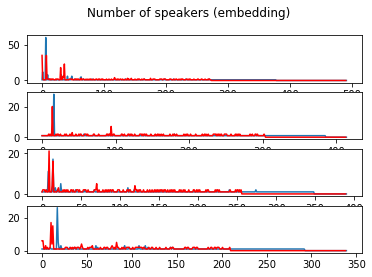

In [146]:

import matplotlib.pyplot as plt
import matplotlib

fig, axs = plt.subplots(4)
fig.suptitle('Number of speakers (embedding)')
axs[0].plot(range(len(count_e_7[1])), count_e_7[1])
axs[0].plot(range(len(count_e_7_s[1])), count_e_7_s[1], color = 'red')
axs[1].plot(range(len(count_e_8_1[1])), count_e_8_1[1])
axs[1].plot(range(len(count_e_8_1_s[1])), count_e_8_1_s[1], color = 'red')
axs[2].plot(range(len(count_e_8_2[1])), count_e_8_2[1])
axs[2].plot(range(len(count_e_8_2_s[1])), count_e_8_2_s[1], color = 'red')
axs[3].plot(range(len(count_e_8_3[1])), count_e_8_3[1])
axs[3].plot(range(len(count_e_8_3_s[1])), count_e_8_3_s[1], color = 'red')

print("Speaker number:", speakercount(count_e_7[1], 3))
print("Speaker number(smooth):", speakercount(count_e_7_s[1], 3))
print("Speaker number:", speakercount(count_e_8_1[1], 3))
print("Speaker number(smooth):", speakercount(count_e_8_1_s[1], 3))
print("Speaker number:", speakercount(count_e_8_2[1], 3))
print("Speaker number(smooth):", speakercount(count_e_8_2_s[1], 3))
print("Speaker number:", speakercount(count_e_8_3[1], 3))
print("Speaker number(smooth):", speakercount(count_e_8_3_s[1], 3))

Speaker number: 9
Speaker number(smooth): 2
Speaker number: 6
Speaker number(smooth): 3
Speaker number: 6
Speaker number(smooth): 2
Speaker number: 5
Speaker number(smooth): 2


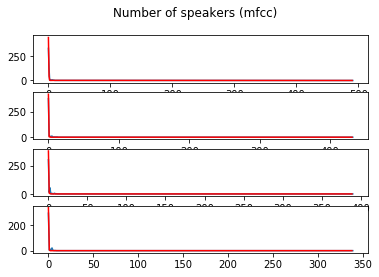

In [147]:
fig, axs = plt.subplots(4)
fig.suptitle('Number of speakers (mfcc)')
axs[0].plot(range(len(count_m_7[1])), count_m_7[1])
axs[0].plot(range(len(count_m_7_s[1])), count_m_7_s[1], color = 'red')
axs[1].plot(range(len(count_m_8_1[1])), count_m_8_1[1])
axs[1].plot(range(len(count_m_8_1_s[1])), count_m_8_1_s[1], color = 'red')
axs[2].plot(range(len(count_m_8_2[1])), count_m_8_2[1])
axs[2].plot(range(len(count_m_8_2_s[1])), count_m_8_2_s[1], color = 'red')
axs[3].plot(range(len(count_m_8_3[1])), count_m_8_3[1])
axs[3].plot(range(len(count_m_8_3_s[1])), count_m_8_3_s[1], color = 'red')

print("Speaker number:", speakercount(count_m_7[1], 3))
print("Speaker number(smooth):", speakercount(count_m_7_s[1], 3))
print("Speaker number:", speakercount(count_m_8_1[1], 3))
print("Speaker number(smooth):", speakercount(count_m_8_1_s[1], 3))
print("Speaker number:", speakercount(count_m_8_2[1], 3))
print("Speaker number(smooth):", speakercount(count_m_8_2_s[1], 3))
print("Speaker number:", speakercount(count_m_8_3[1], 3))
print("Speaker number(smooth):", speakercount(count_m_8_3_s[1], 3))